# Классификация MNIST сверточной сетью

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow import keras

/home/truename/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/truename/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/truename/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/truename/anaconda3/lib/python3.7/site-packages/tensorflow/python/frame

In [2]:
train = np.loadtxt('../002/data/digit/train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('../002/data/digit/test.csv', delimiter=',', skiprows=1)

In [3]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]

# приводим размерность к удобному для обаботки виду
# добавляем размерность канала
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28, 1))
test_img = np.resize(test, (test.shape[0], 28, 28, 1))

## Визуализируем исходные данные

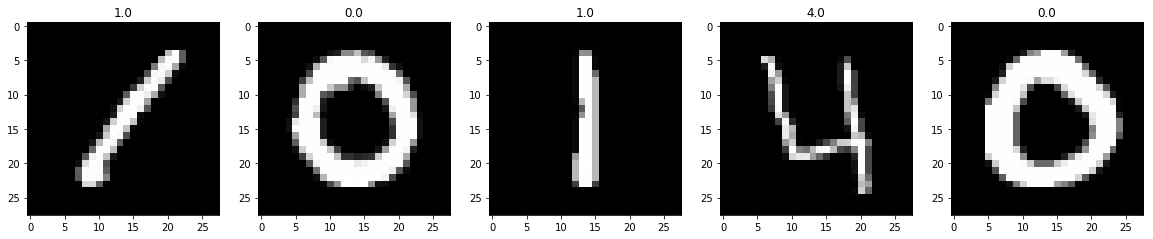

In [4]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:5, :], 1):
    subplot = fig.add_subplot(1, 5, i)
    plt.imshow(img[:,:,0], cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

## Разбиваем выборку на обучение и валидацию

In [5]:
from sklearn.model_selection import train_test_split
y_train, y_val, x_train, x_val = train_test_split(
    train_label, train_img, test_size=0.2, random_state=42)

## Собираем сверточную сеть для обучения

In [6]:
seed = 123457
kernek_initializer = keras.initializers.glorot_normal(seed=seed)
bias_initializer = keras.initializers.normal(stddev=1., seed=seed)

model = keras.models.Sequential()

model.add(keras.layers.Conv2D(6, 
                              kernel_size=(5, 5), 
                              padding='same', 
                              activation='relu', 
                              input_shape=x_train.shape[1:],
                              bias_initializer=bias_initializer,
                              kernel_initializer=kernek_initializer))

model.add(keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'))

model.add(keras.layers.Conv2D(16, 
                              kernel_size=(5, 5),
                              padding='valid',
                              activation='relu', 
                              bias_initializer=bias_initializer,
                              kernel_initializer=kernek_initializer))

model.add(keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(32, activation='relu',
                             bias_initializer=bias_initializer,
                             kernel_initializer=kernek_initializer))

model.add(keras.layers.Dense(10, activation='softmax',
                             bias_initializer=bias_initializer,
                             kernel_initializer=kernek_initializer))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


## Выводим информацию о модели

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                12832     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total para

## One hot encoding разметки

In [8]:
y_train_labels = keras.utils.to_categorical(y_train)

In [9]:
y_train[:10]

array([6., 5., 3., 4., 7., 8., 6., 7., 0., 9.])

In [10]:
y_train_labels[:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

## Запускаем обучение

In [11]:
model.fit(x_train, 
          y_train_labels,
          batch_size=32, 
          epochs=5,
          validation_split=0.2)

Train on 26880 samples, validate on 6720 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
26880/26880 [==============================] - 44s 2ms/sample - loss: 0.9870 - acc: 0.8034 - val_loss: 0.2529 - val_acc: 0.9292
Epoch 2/5
26880/26880 [==============================] - 43s 2ms/sample - loss: 0.1831 - acc: 0.9477 - val_loss: 0.1741 - val_acc: 0.9557
Epoch 3/5
26880/26880 [==============================] - 43s 2ms/sample - loss: 0.1157 - acc: 0.9656 - val_loss: 0.1259 - val_acc: 0.9671
Epoch 4/5
26880/26880 [==============================] - 45s 2ms/sample - loss: 0.0834 - acc: 0.9746 - val_loss: 0.1189 - val_acc: 0.9659
Epoch 5/5
26880/26880 [==============================] - 44s 2ms/sample - loss: 0.0686 - acc: 0.9785 - val_loss: 0.0957 - val_acc: 0.9746


## Предсказываем класс объекта

In [12]:
pred_val = model.predict_classes(x_val)

In [13]:
pred_val[:10]

array([8, 1, 9, 9, 8, 6, 2, 2, 7, 1])

## Оцениваем качество решение на валидационной выборке

In [14]:
from sklearn.metrics import accuracy_score
print('Accuracy: %s' % accuracy_score(y_val, pred_val))

Accuracy: 0.9738095238095238


In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_val, pred_val))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       816
         1.0       0.99      0.99      0.99       909
         2.0       0.97      0.97      0.97       846
         3.0       0.97      0.96      0.97       937
         4.0       0.98      0.97      0.98       839
         5.0       0.95      0.98      0.96       702
         6.0       0.98      0.99      0.98       785
         7.0       0.96      0.98      0.97       893
         8.0       0.97      0.95      0.96       835
         9.0       0.97      0.97      0.97       838

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



In [16]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_val, pred_val))

[[807   0   1   0   0   1   3   0   2   2]
 [  0 896   3   2   1   0   1   6   0   0]
 [  1   3 819   8   2   0   3   5   4   1]
 [  1   0   4 899   0  20   0  10   2   1]
 [  2   1   4   0 811   0   4   2   5  10]
 [  0   0   0   3   0 688   7   2   1   1]
 [  2   0   0   0   1   4 775   0   3   0]
 [  0   0   9   0   1   2   0 877   2   2]
 [  2   2   5  11   2  10   1   4 793   5]
 [  2   0   1   0   6   1   0   8   5 815]]


## Предсказания на тестовыйх данных

In [17]:
pred_test = model.predict_classes(test_img)

## Визуализируем предсказания

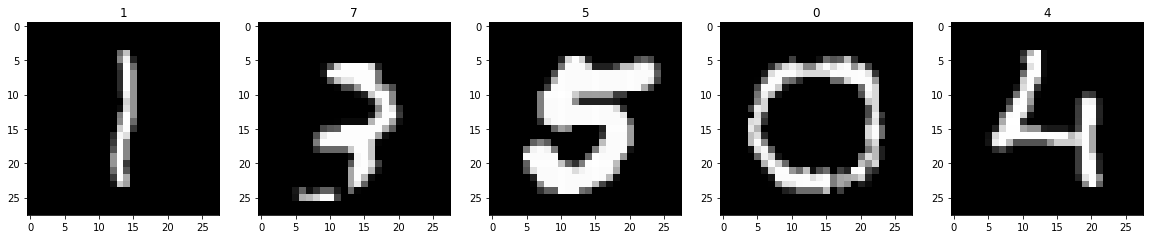

In [18]:
fig = plt.figure(figsize=(20, 10))
indices = np.random.choice(range(len(test_img)), 5)
img_prediction = zip(test_img[indices], pred_test[indices])
for i, (img, pred) in enumerate(img_prediction, 1):
    subplot = fig.add_subplot(1, 5, i)
    plt.imshow(img[...,0], cmap='gray');
    subplot.set_title('%d' % pred);

## Готовим файл для отправки

In [19]:
with open('submit.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(pred_test, 1):
        dst.write('%s,%d\n' % (i, p))

In [20]:
# Your submission scored 0.96814